# Main Function

Need to do the following in terminal to run:
mkdir tmp
mkdir tmp/ppo
mkdir plots


In [1]:
import gym
import torch
import numpy as np
from ipynb.fs.full.CartPolePPO import Agent
from utils import plot_learning_curve

/Users/stanleyaraki/miniconda3/lib/python3.9/site-packages/gym/envs/registration.py:518: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1` with the environment ID `CartPole-v1`.
  logger.warn(
/Users/stanleyaraki/Desktop/Data_Analysis_Portfolio/Proximal-Policy-Optimization/CartPolePPO.ipynb:209: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1646756029501/work/torch/csrc/utils/tensor_new.cpp:210.)
  "\n",


... saving models ...
episode 0 score 12.0 avg score 12.0 time_steps 12 learning_steps 0
... saving models ...
episode 1 score 22.0 avg score 17.0 time_steps 34 learning_steps 1
episode 2 score 15.0 avg score 16.3 time_steps 49 learning_steps 2
... saving models ...
episode 3 score 27.0 avg score 19.0 time_steps 76 learning_steps 3
... saving models ...
episode 4 score 40.0 avg score 23.2 time_steps 116 learning_steps 5
episode 5 score 14.0 avg score 21.7 time_steps 130 learning_steps 6
episode 6 score 32.0 avg score 23.1 time_steps 162 learning_steps 8
episode 7 score 10.0 avg score 21.5 time_steps 172 learning_steps 8
episode 8 score 8.0 avg score 20.0 time_steps 180 learning_steps 9
episode 9 score 10.0 avg score 19.0 time_steps 190 learning_steps 9
episode 10 score 13.0 avg score 18.5 time_steps 203 learning_steps 10
episode 11 score 10.0 avg score 17.8 time_steps 213 learning_steps 10
episode 12 score 14.0 avg score 17.5 time_steps 227 learning_steps 11
episode 13 score 11.0 avg s

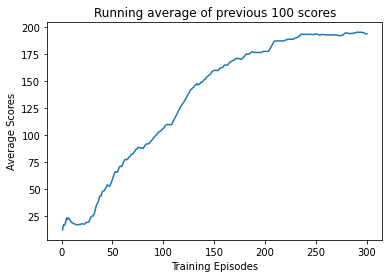

In [2]:
if __name__ == '__main__':
    env = gym.make('CartPole-v0')
    N = 20
    batch_size = 5
    n_epochs = 4
    alpha = 0.0003
    agent = Agent(num_actions=env.action_space.n, batch_size=batch_size, 
                    alpha=alpha, num_epochs=n_epochs, 
                    input_dims=env.observation_space.shape) # does work on more advanced environments but requires more fine-tuning
    n_games = 300

    figure_file = 'plots/cartpole.png'

    best_score = env.reward_range[0]
    score_history = []

    learn_iters = 0
    avg_score = 0
    n_steps = 0

    for i in range(n_games):
        observation = env.reset()
        done = False
        score = 0
        while not done:
            action, prob, val = agent.choose_action(observation)
            observation_, reward, done, info = env.step(action)
            n_steps += 1
            score += reward
            agent.remember(observation, action, prob, val, reward, done)
            if n_steps % N == 0: # if true, it's time to perform learning function
                agent.learn()
                learn_iters += 1
            observation = observation_
        score_history.append(score)
        avg_score = np.mean(score_history[-100:])

        if avg_score > best_score: # if best score found
            best_score = avg_score
            agent.save_models()

        print('episode', i, 'score %.1f' % score, 'avg score %.1f' % avg_score,
                'time_steps', n_steps, 'learning_steps', learn_iters)
    x = [i+1 for i in range(len(score_history))]
    # print("Final Score: ", score_history[-1])
    
    plot_learning_curve(x, score_history, figure_file, "Training Episodes", "Average Scores")



# Save Trained Model

In [4]:
agent.save_models()

... saving models ...


# Load Trained Model and Run Iteration

In [11]:
agent.load_models()

... loading models ...


In [14]:
env = gym.make('CartPole-v0')
env.reset()
score = 0
done = False
n_steps = 0
while not done:
    env.render()
    action, prob, val = agent.choose_action(observation)
    observation_, reward, done, info = env.step(action)
    n_steps += 1
    score += reward
    agent.remember(observation, action, prob, val, reward, done)
    if n_steps % N == 0: # if true, it's time to perform learning function
        agent.learn()
        learn_iters += 1
    observation = observation_
print(score)
env.close()


200.0
